## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [42]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [43]:
df=pd.read_csv("data/Stu_cleaned.csv")

In [44]:
df.head()

,Unnamed: 0,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [45]:
df=df.drop("Unnamed: 0",axis=1)

In [46]:
X=df.drop("math_score",axis=1)

In [47]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [48]:
y=df["math_score"]

In [49]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [50]:
# Create Column Transformer with 3 types of transformers
categorical_columns=X.select_dtypes(include="object").columns
numerical_columns=X.select_dtypes(exclude="object").columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
one_encoder=OneHotEncoder(drop="first")
scaler=StandardScaler()

preprocessing=ColumnTransformer(
    [
        ("OneHot",one_encoder,categorical_columns),
        ("Scaler",scaler,numerical_columns)
    ]
)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
X_train=preprocessing.fit_transform(X_train)

In [53]:
X_test=preprocessing.transform(X_test)

In [54]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.030791,0.434053,0.058830,0.058830
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930290,0.964701,0.648898,0.648898
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.345443,1.163694,1.168158,1.168158
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.176786,-0.162925,-0.248006,-0.248006
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.384363,-0.759904,-0.248006,-0.248006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.106557,2.092328,1.947049,1.947049
796,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.453555,-0.494580,-0.271608,-0.271608
797,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.522747,-1.025228,-0.861677,-0.861677
798,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.491438,-1.025228,-1.262923,-1.262923


#### Create an Evaluate Function to give all metrics after model Training

In [55]:
def performance(test,pred):
    print("MAE: ",mean_absolute_error(test,pred))
    print("MSE: ",mean_squared_error(test,pred))
    print("R2 Score: ",r2_score(test,pred))
    

In [56]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    print(f"-----------For Model: {list(models.keys())[i]}-----------")

    print("Score for Training Data")
    performance(y_train,y_train_pred)
    print("---------------------------------")
    print("Score for Testing Data")
    performance(y_test,y_test_pred)
    print("===============================================\n")
    


-----------For Model: LinearRegression-----------
Score for Training Data
MAE:  5.732303520744609e-14
MSE:  5.118003335329089e-27
R2 Score:  1.0
---------------------------------
Score for Testing Data
MAE:  5.730527163905208e-14
MSE:  5.2105209422934094e-27
R2 Score:  1.0

-----------For Model: Ridge-----------
Score for Training Data
MAE:  0.2670102136567076
MSE:  0.11077045559689623
R2 Score:  0.9995086640459251
---------------------------------
Score for Testing Data
MAE:  0.2631690631611584
MSE:  0.11326528102475023
R2 Score:  0.9995345359342186

-----------For Model: Lasso-----------
Score for Training Data
MAE:  3.741840626231751
MSE:  22.425314942252033
R2 Score:  0.9005297626229953
---------------------------------
Score for Testing Data
MAE:  3.756158981363189
MSE:  22.225361551936693
R2 Score:  0.9086647995058047

-----------For Model: KNeighborsRegressor-----------
Score for Training Data
MAE:  3.4145000000000003
MSE:  18.5215
R2 Score:  0.9178456130349812
-----------------

## Linear Regression

In [57]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

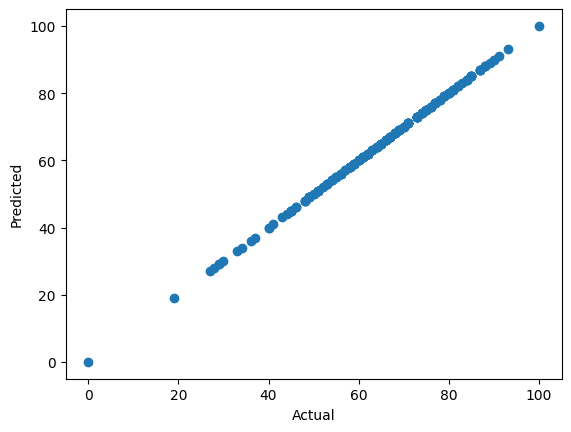

In [58]:
## Plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

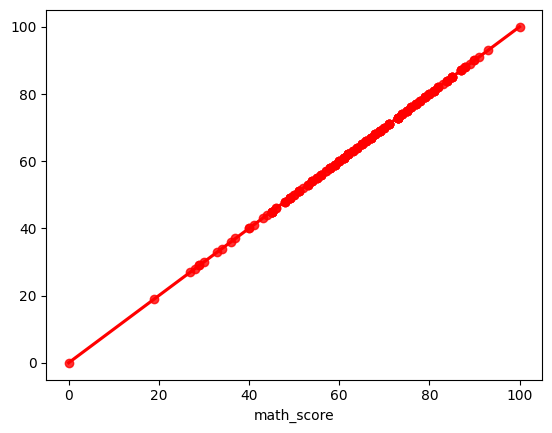

In [59]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [41]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-1.136868e-13
737,53,53.0,1.421085e-14
740,80,80.0,-2.842171e-14
660,74,74.0,-8.526513e-14
411,84,84.0,-1.563194e-13
...,...,...,...
408,52,52.0,1.634248e-13
332,62,62.0,7.815970e-14
208,74,74.0,-2.842171e-14
613,65,65.0,-5.684342e-14
